In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [131]:
# load data file
bank = pd.read_csv("bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [132]:
#check if data set contains null values - Nothing found!

bank[bank.isnull().any(axis=1)].count()


age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [133]:
bank.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


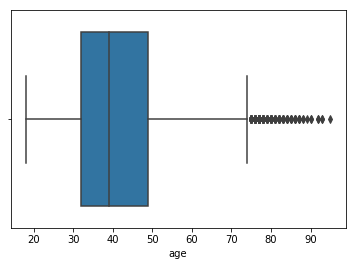

In [134]:
#box-plot for age
#a = sns.boxplot(x=bank["age"])
#a = sns.boxplot(bank["age"])
a = sns.boxplot(bank.age)


C:\Users\DELL\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


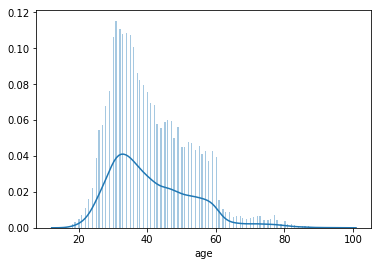

In [135]:
#Distribution of age


#sns.distplot(bank.age, bins=100)
#sns.distplot(bank["age"], bins=100)
sns.distplot(bank.age, bins=200)


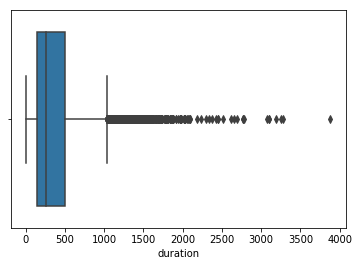

In [136]:
#box-plot for duration
a = sns.boxplot(bank["duration"])

C:\Users\DELL\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


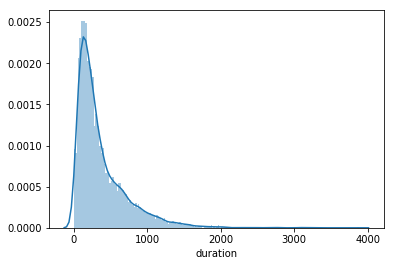

In [137]:
#Distribution of duration
sns.distplot(bank["duration"], bins=200)

In [138]:
bank_data = bank.copy()
print(bank_data)

       age            job   marital  education default  balance housing loan  \
0       59         admin.   married  secondary      no     2343     yes   no   
1       56         admin.   married  secondary      no       45      no   no   
2       41     technician   married  secondary      no     1270     yes   no   
3       55       services   married  secondary      no     2476     yes   no   
4       54         admin.   married   tertiary      no      184      no   no   
5       42     management    single   tertiary      no        0     yes  yes   
6       56     management   married   tertiary      no      830     yes  yes   
7       60        retired  divorced  secondary      no      545     yes   no   
8       37     technician   married  secondary      no        1     yes   no   
9       28       services    single  secondary      no     5090     yes   no   
10      38         admin.    single  secondary      no      100     yes   no   
11      30    blue-collar   married  sec

In [139]:
# Explore People who made a deposit Vs Job category

In [140]:
for col in bank.columns:
    print(col)

age
job
marital
education
default
balance
housing
loan
contact
day_of_week
month
duration
campaign
pdays
previous
poutcome
y


In [141]:
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}".format(j, len(bank_data[(bank_data.y == "yes") & (bank_data.job == j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [142]:
# Different types of job categories and their counts

In [143]:
bank_data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [144]:
# Combine similar jobs into categiroes

In [145]:
bank_data['job'] = bank_data['job'].replace(['management','amin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired','student', 'unemployed', 'unknown'], 'other')

In [146]:
bank_data.job.value_counts()

white-collar     2566
blue-collar      1944
technician       1823
other            1565
admin.           1334
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [147]:
print(bank_data.poutcome)

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
5        unknown
6        unknown
7        unknown
8        unknown
9        unknown
10       unknown
11       unknown
12       unknown
13       unknown
14       unknown
15       unknown
16       unknown
17       unknown
18       unknown
19       unknown
20       unknown
21       unknown
22       unknown
23       unknown
24       unknown
25       unknown
26       unknown
27       unknown
28       unknown
29       unknown
          ...   
11132    unknown
11133    failure
11134    unknown
11135    unknown
11136    unknown
11137    unknown
11138    unknown
11139    unknown
11140    unknown
11141    unknown
11142    unknown
11143    unknown
11144    unknown
11145    failure
11146    unknown
11147    unknown
11148    unknown
11149    unknown
11150    unknown
11151    unknown
11152    unknown
11153    unknown
11154    unknown
11155    failure
11156    unknown
11157    unknown
11158    unknown
11159    unkno

In [148]:
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [149]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'

In [150]:
bank_data['poutcome']= bank_data['poutcome'].replace(['other'], 'nonexistent')

In [151]:
bank_data.poutcome.value_counts()

unknown        8326
failure        1228
success        1071
nonexistent     537
Name: poutcome, dtype: int64

In [152]:
# Drop 'contact', as every participant has been contacted.

In [153]:
bank_data.drop('contact',axis=1, inplace=True)

In [154]:
# values for "default" : yes/no

In [155]:
bank_data.default

bank_data['default_new'] = bank_data['y'].map({'yes':1 , 'no':0})
bank_data.drop('default',axis=1,inplace = True)
print(bank_data.default_new)

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
11132    0
11133    0
11134    0
11135    0
11136    0
11137    0
11138    0
11139    0
11140    0
11141    0
11142    0
11143    0
11144    0
11145    0
11146    0
11147    0
11148    0
11149    0
11150    0
11151    0
11152    0
11153    0
11154    0
11155    0
11156    0
11157    0
11158    0
11159    0
11160    0
11161    0
Name: default_new, Length: 11162, dtype: int64


In [156]:
# values for "housing" : yes/no
bank_data.housing

0        yes
1         no
2        yes
3        yes
4         no
5        yes
6        yes
7        yes
8        yes
9        yes
10       yes
11       yes
12       yes
13       yes
14       yes
15       yes
16       yes
17       yes
18       yes
19       yes
20       yes
21       yes
22       yes
23       yes
24       yes
25       yes
26       yes
27       yes
28       yes
29       yes
        ... 
11132    yes
11133    yes
11134     no
11135     no
11136    yes
11137     no
11138    yes
11139     no
11140    yes
11141    yes
11142     no
11143    yes
11144    yes
11145     no
11146     no
11147     no
11148    yes
11149     no
11150     no
11151    yes
11152    yes
11153     no
11154    yes
11155    yes
11156    yes
11157    yes
11158     no
11159     no
11160     no
11161     no
Name: housing, Length: 11162, dtype: object

In [157]:
bank_data.housing

bank_data['housing_new'] = bank_data['housing'].map({'yes':1 , 'no':0})
bank_data.drop('housing',axis=1,inplace = True)
print(bank_data.housing_new)

0        1
1        0
2        1
3        1
4        0
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
11132    1
11133    1
11134    0
11135    0
11136    1
11137    0
11138    1
11139    0
11140    1
11141    1
11142    0
11143    1
11144    1
11145    0
11146    0
11147    0
11148    1
11149    0
11150    0
11151    1
11152    1
11153    0
11154    1
11155    1
11156    1
11157    1
11158    0
11159    0
11160    0
11161    0
Name: housing_new, Length: 11162, dtype: int64


In [158]:
# values for "loan" : yes/no
bank_data.loan

0         no
1         no
2         no
3         no
4         no
5        yes
6        yes
7         no
8         no
9         no
10        no
11        no
12       yes
13        no
14        no
15        no
16        no
17        no
18        no
19       yes
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
11132    yes
11133     no
11134     no
11135     no
11136     no
11137     no
11138     no
11139     no
11140     no
11141     no
11142    yes
11143    yes
11144     no
11145     no
11146    yes
11147     no
11148     no
11149     no
11150     no
11151     no
11152     no
11153     no
11154    yes
11155    yes
11156     no
11157     no
11158     no
11159     no
11160    yes
11161     no
Name: loan, Length: 11162, dtype: object

In [159]:
bank_data['loan_new'] = bank_data['loan'].map({'yes':1 , 'no':0})
bank_data.drop('loan',axis=1,inplace = True)
print(bank_data.loan_new)

0        0
1        0
2        0
3        0
4        0
5        1
6        1
7        0
8        0
9        0
10       0
11       0
12       1
13       0
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
11132    1
11133    0
11134    0
11135    0
11136    0
11137    0
11138    0
11139    0
11140    0
11141    0
11142    1
11143    1
11144    0
11145    0
11146    1
11147    0
11148    0
11149    0
11150    0
11151    0
11152    0
11153    0
11154    1
11155    1
11156    0
11157    0
11158    0
11159    0
11160    1
11161    0
Name: loan_new, Length: 11162, dtype: int64


In [160]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning

In [161]:
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day_of_week', axis=1, inplace=True)

In [162]:
# values for "deposit" : yes/no
bank_data.y

0        yes
1        yes
2        yes
3        yes
4        yes
5        yes
6        yes
7        yes
8        yes
9        yes
10       yes
11       yes
12       yes
13       yes
14       yes
15       yes
16       yes
17       yes
18       yes
19       yes
20       yes
21       yes
22       yes
23       yes
24       yes
25       yes
26       yes
27       yes
28       yes
29       yes
        ... 
11132     no
11133     no
11134     no
11135     no
11136     no
11137     no
11138     no
11139     no
11140     no
11141     no
11142     no
11143     no
11144     no
11145     no
11146     no
11147     no
11148     no
11149     no
11150     no
11151     no
11152     no
11153     no
11154     no
11155     no
11156     no
11157     no
11158     no
11159     no
11160     no
11161     no
Name: y, Length: 11162, dtype: object

In [163]:
bank_data['deposit_new']= bank_data['y'].map({'yes':1, 'no':0})
bank_data.drop('y',axis = 1, inplace=True)
bank_data.deposit_new

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
11132    0
11133    0
11134    0
11135    0
11136    0
11137    0
11138    0
11139    0
11140    0
11141    0
11142    0
11143    0
11144    0
11145    0
11146    0
11147    0
11148    0
11149    0
11150    0
11151    0
11152    0
11153    0
11154    0
11155    0
11156    0
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit_new, Length: 11162, dtype: int64

In [164]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
#       -1 means client was not previously contacted

In [165]:
bank_data.pdays

0         -1
1         -1
2         -1
3         -1
4         -1
5         -1
6         -1
7         -1
8         -1
9         -1
10        -1
11        -1
12        -1
13        -1
14        -1
15        -1
16        -1
17        -1
18        -1
19        -1
20        -1
21        -1
22        -1
23        -1
24        -1
25        -1
26        -1
27        -1
28        -1
29        -1
        ... 
11132     -1
11133    260
11134     -1
11135     -1
11136     -1
11137     -1
11138     -1
11139     -1
11140     -1
11141     -1
11142     -1
11143     -1
11144     -1
11145    271
11146     -1
11147     -1
11148     -1
11149     -1
11150     -1
11151     -1
11152     -1
11153     -1
11154     -1
11155    172
11156     -1
11157     -1
11158     -1
11159     -1
11160    172
11161     -1
Name: pdays, Length: 11162, dtype: int64

In [166]:
print('Customers that have not been contacted before: ',len(bank_data[bank_data.pdays==999]))
print('Maximum value on pdays: ', bank_data.pdays.max())


('Customers that have not been contacted before: ', 0)
('Maximum value on pdays: ', 854)


In [167]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect

In [168]:
bank_data.loc[bank_data['pdays']==999, 'pdays']=10000
bank_data.loc[bank_data['pdays']==0, 'pdays']=0.1


In [169]:
# Create a new column: recent_pdays 
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)


#Drop pdays
bank_data.drop('pdays', axis=1,inplace=True)

In [170]:
bank_data.recent_pdays.describe()

count    11162.000000
mean        -0.742695
std          0.441721
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          0.001919
max          1.000000
Name: recent_pdays, dtype: float64

In [171]:
bank_data.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_new,housing_new,loan_new,deposit_new,recent_pdays
11157,33,blue-collar,single,primary,1,257,1,0,unknown,0,1,0,0,-1.000000
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,0,0,0,0,-1.000000
11159,32,technician,single,secondary,29,156,2,0,unknown,0,0,0,0,-1.000000
11160,43,technician,married,secondary,0,9,2,5,failure,0,0,1,0,0.005814
11161,34,technician,married,secondary,0,628,1,0,unknown,0,0,0,0,-1.000000


In [172]:
# Convert categorical variables to dummies

In [173]:
bank_dummies = pd.get_dummies(bank_data, columns = ['job', 'marital', 'education', 'poutcome'])
bank_dummies.head()

,age,balance,duration,campaign,previous,default_new,housing_new,loan_new,deposit_new,recent_pdays,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,1,1,0,1,-1.0,...,1,0,0,1,0,0,0,0,0,1
1,56,45,1467,1,0,1,0,0,1,-1.0,...,1,0,0,1,0,0,0,0,0,1
2,41,1270,1389,1,0,1,1,0,1,-1.0,...,1,0,0,1,0,0,0,0,0,1
3,55,2476,579,1,0,1,1,0,1,-1.0,...,1,0,0,1,0,0,0,0,0,1
4,54,184,673,2,0,1,0,0,1,-1.0,...,1,0,0,0,1,0,0,0,0,1


In [174]:
bank_dummies = pd.get_dummies(bank_data, columns = ['job', 'marital', 'education', 'poutcome'],prefix = ['job', 'marital', 'education', 'poutcome'])
bank_dummies.head()

,age,balance,duration,campaign,previous,default_new,housing_new,loan_new,deposit_new,recent_pdays,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,1,1,0,1,-1.0,...,1,0,0,1,0,0,0,0,0,1
1,56,45,1467,1,0,1,0,0,1,-1.0,...,1,0,0,1,0,0,0,0,0,1
2,41,1270,1389,1,0,1,1,0,1,-1.0,...,1,0,0,1,0,0,0,0,0,1
3,55,2476,579,1,0,1,1,0,1,-1.0,...,1,0,0,1,0,0,0,0,0,1
4,54,184,673,2,0,1,0,0,1,-1.0,...,1,0,0,0,1,0,0,0,0,1


In [175]:
bank_dummies.shape

(11162, 29)

In [176]:
bank_dummies.describe()

,age,balance,duration,campaign,previous,default_new,housing_new,loan_new,deposit_new,recent_pdays,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.473840,0.473123,0.130801,0.473840,-0.742695,...,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.048110,0.095951,0.745924
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.499338,0.499299,0.337198,0.499338,0.441721,...,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.214008,0.294537,0.435360
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.001919,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
## Scatterplot showing age and balance

In [ ]:
bank_dummies.plot(kind = 'scatter', x='age',y='balance')


# Across all ages, majority of people have savings of less than 20000.

In [ ]:
bank_dummies.plot(kind='hist',x = 'poutcome_success', y = 'duration')

In [ ]:
# People who sign up to a term deposite

In [181]:
bank_dummies[bank_data.deposit_new == 1].describe()

,age,balance,duration,campaign,previous,default_new,housing_new,loan_new,deposit_new,recent_pdays,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,1.0,0.365854,0.091511,1.0,-0.635644,...,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.058045,0.184912,0.640197
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.0,0.481714,0.288361,0.0,0.486940,...,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.233851,0.388263,0.479988
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.0,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.0,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,1.0,0.000000,0.000000,1.0,-1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,1.0,1.000000,0.000000,1.0,0.005128,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.0,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [182]:
# People signed up to a term deposite having a personal loan (loan_new) and housing loan (housing_new)

In [183]:
len(bank_dummies[(bank_dummies.deposit_new == 1) & (bank_dummies.loan_new) & (bank_dummies.housing_new)])

265

In [184]:
# People signed up to a term deposite with a credit default

In [185]:
len(bank_dummies[(bank_dummies.deposit_new == 1) & (bank_dummies.default_new == 1)])

5289

In [186]:
# Bar chart of job Vs deposite

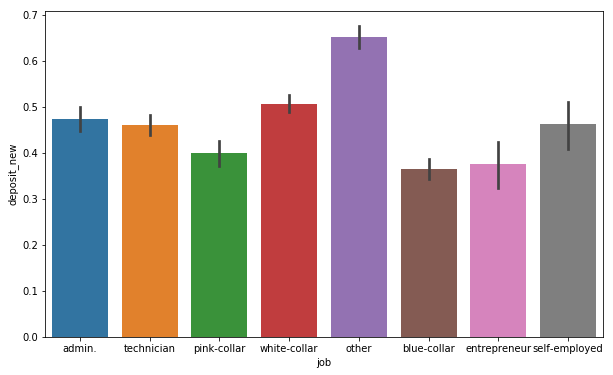

In [187]:
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_new', data = bank_data)

In [188]:
# Bar chart of "previous outcome" Vs "call duration"


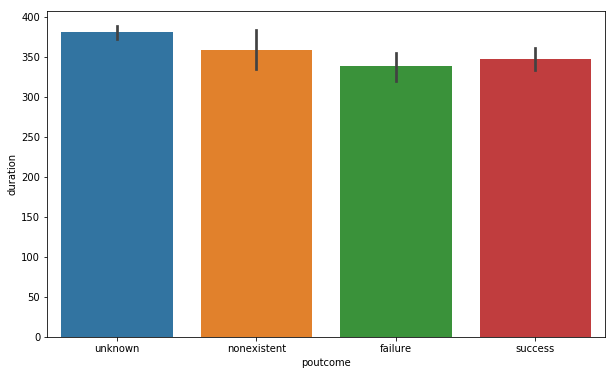

In [189]:
plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y='duration', data=bank_data)

In [190]:
#make a copy

In [191]:
bankc1 = bank_dummies

In [192]:
#the correlation matrix

In [193]:
cr = bankc1.corr()
cr

,age,balance,duration,campaign,previous,default_new,housing_new,loan_new,deposit_new,recent_pdays,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,0.034901,-0.168700,-0.031418,0.034901,0.028039,...,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,-0.018715,0.062114,-0.027021
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,0.081129,-0.077092,-0.084589,0.081129,0.045154,...,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.028521,0.045603,-0.046091
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,0.451919,0.035051,-0.001914,0.451919,-0.044152,...,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.008782,-0.022578,0.044006
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,-0.128081,0.006660,0.034722,-0.128081,-0.131341,...,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.023689,-0.091807,0.131392
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,0.139867,-0.000840,-0.022668,0.139867,0.621850,...,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.326587,0.325477,-0.622149
default_new,0.034901,0.081129,0.451919,-0.128081,0.139867,1.000000,-0.203888,-0.110580,1.000000,0.229995,...,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.044059,0.286642,-0.230470
housing_new,-0.168700,-0.077092,0.035051,0.006660,-0.000840,-0.203888,1.000000,0.076761,-0.203888,-0.025897,...,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,0.010006,-0.136299,0.024227
loan_new,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,-0.110580,0.076761,1.000000,-0.110580,-0.059365,...,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.020164,-0.080370,0.059783
deposit_new,0.034901,0.081129,0.451919,-0.128081,0.139867,1.000000,-0.203888,-0.110580,1.000000,0.229995,...,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.044059,0.286642,-0.230470
recent_pdays,0.028039,0.045154,-0.044152,-0.131341,0.621850,0.229995,-0.025897,-0.059365,0.229995,1.000000,...,-0.013170,0.038913,-0.060787,-0.013486,0.055994,0.005502,0.597238,0.386792,0.558397,-0.997186


In [194]:
#Heatmap

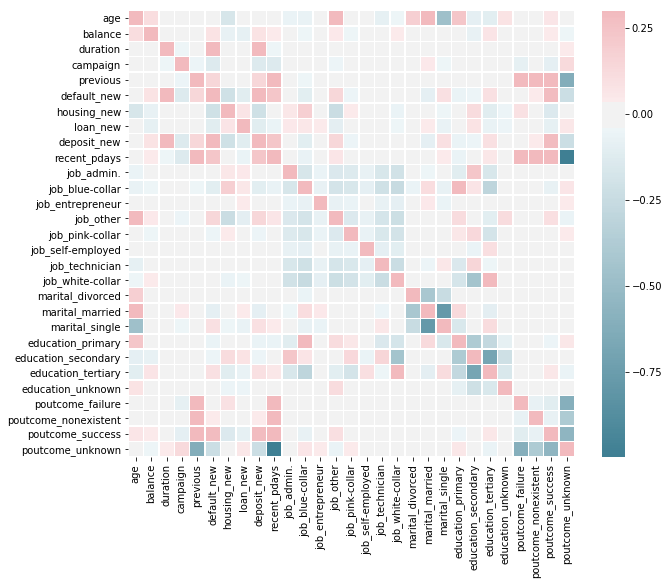

In [195]:
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(cr, xticklabels=cr.columns.values, yticklabels=cr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})

In [196]:
# Extract the deposte_new column (the dependent variable)

In [197]:
corr_deposite = pd.DataFrame(cr['deposit_new'].drop('deposit_new'))
corr_deposite.sort_values(by = 'deposit_new', ascending = False)

,deposit_new
default_new,1.000000
duration,0.451919
poutcome_success,0.286642
recent_pdays,0.229995
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
poutcome_nonexistent,0.044059


In [198]:
bankc1.describe()
bankc1.to_csv(r'datanew.csv')

#bankc1[bankc1.isnan().any(axis=1)].count()
np.isinf(bankc1.values.any())

False

In [199]:
# Train-Test split: 20% test data

In [200]:
data_drop_deposit = bankc1.drop('deposit_new', 1)
label  = bankc1.deposit_new
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposit,label,test_size = 0.2, random_state = 50)

In [201]:
# Decision tree with depth = 2

In [202]:
dt2 = tree.DecisionTreeClassifier(random_state = 1, max_depth = 2)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print('Training Score: ', dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print('Testing Score: ', dt2_score_test)

('Training Score: ', 1.0)
('Testing Score: ', 1.0)


In [203]:
# Decision tree with depth = 3

In [204]:
dt3 = tree.DecisionTreeClassifier(random_state = 1, max_depth = 3)
dt3.fit(data_train, label_train)
dt3_score_train = dt3.score(data_train, label_train)
print('Training Score: ', dt3_score_train)
dt3_score_test = dt3.score(data_test, label_test)
print('Testing Score: ', dt3_score_test)

('Training Score: ', 1.0)
('Testing Score: ', 1.0)


In [205]:
# Decision tree with depth = 4

In [206]:
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

('Training score: ', 1.0)
('Testing score: ', 1.0)


In [207]:
# Decision tree with depth = 6

In [208]:
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

('Training score: ', 1.0)
('Testing score: ', 1.0)


In [209]:
# Decision tree: To the full depth

In [210]:
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

('Training score: ', 1.0)
('Testing score: ', 1.0)


In [211]:
#Compare Training and Testing scores for various tree depths used
print('{:10} {:20} {:20}'.format('depth','Training Score','Testing Score'))
print('{:10} {:20} {:20}'.format('------','-------------','--------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training Score       Testing Score       
------     -------------        --------------      
2                       1.0                  1.0
3                       1.0                  1.0
4                       1.0                  1.0
6                       1.0                  1.0
max                     1.0                  1.0


In [212]:
# Let's generate the decision tree for depth = 2
# Create a feature vector


In [213]:
features = bankc1.columns.tolist()

# Uncomment below to generate the digraph Tree.
#tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=features)

In [214]:
# Two classes: 0 = not signed up,  1 = signed up
dt2.classes_

array([0, 1], dtype=int64)

In [215]:
# Create a feature vector
features = data_drop_deposit.columns.tolist()

features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_new',
 'housing_new',
 'loan_new',
 'recent_pdays',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'poutcome_unknown']

In [216]:
# Investigate most important features with depth =2

In [217]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
dt2.fit(data_train, label_train)

fi = dt2.feature_importances_


l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.0
campaign............ 0.0
previous............ 0.0
default_new......... 1.0
housing_new......... 0.0
loan_new............ 0.0
recent_pdays........ 0.0
job_admin........... 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_nonexistent 0.0
poutcome_success.... 0.0
poutcome_unknown.... 0.0


In [218]:
# According to feature importance results, most importtant feature is the "Duration"
# Let's calculte statistics on Duration

In [219]:
print("Mean duration   : ", data_drop_deposit.duration.mean())
print("Maximun duration: ", data_drop_deposit.duration.max())
print("Minimum duration: ", data_drop_deposit.duration.min())

('Mean duration   : ', 371.99381831213043)
('Maximun duration: ', 3881)
('Minimum duration: ', 2)


In [220]:
# Get a row with poutcome_success = 1
#bank_with_dummies[(bank_with_dummies.poutcome_success == 1)]
data_drop_deposit.iloc[985]

age                       46.000000
balance                 3354.000000
duration                 522.000000
campaign                   1.000000
previous                   1.000000
default_new                1.000000
housing_new                1.000000
loan_new                   0.000000
recent_pdays               0.005747
job_admin.                 0.000000
job_blue-collar            0.000000
job_entrepreneur           0.000000
job_other                  1.000000
job_pink-collar            0.000000
job_self-employed          0.000000
job_technician             0.000000
job_white-collar           0.000000
marital_divorced           1.000000
marital_married            0.000000
marital_single             0.000000
education_primary          0.000000
education_secondary        1.000000
education_tertiary         0.000000
education_unknown          0.000000
poutcome_failure           0.000000
poutcome_nonexistent       0.000000
poutcome_success           1.000000
poutcome_unknown           0

In [221]:
# Make predictions on the test set
preds = dt2.predict(data_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
1.0

Area Under Curve: 
1.0


In [223]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)

# Fit the decision tree classifier
dt2.fit(data_train, label_train)

fi = dt2.feature_importances_


# Make predictions on the test set
preds = dt2.predict(data_test)
print preds

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))



[1 0 1 ... 0 0 0]

Accuracy score: 
1.0

Area Under Curve: 
1.0


In [224]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
    
regr_2 = AdaBoostClassifier(base_estimator= tree.DecisionTreeClassifier(max_depth=20),
                          n_estimators=50, random_state=1)

# Fit the decision tree classifier
regr_2.fit(data_train, label_train)


# Make predictions on the test set
preds = regr_2.predict(data_test)

#print preds
#plt.scatter(label_test,preds)
#print label_test
 #Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

#Make predictions on the test set using predict_proba
probs = regr_2.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
1.0

Area Under Curve: 
1.0


In [225]:
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from sklearn import metrics
svc = SVC(kernel='linear', C = 1.0)
#svc = LinearSVC()
svc.fit(data_train, label_train)


label_pred = svc.predict(data_test)
confusion_matrix(label_test, label_pred)
 #Calculate accuracy
    
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, label_pred)))


Accuracy score: 
0.995073891626


In [226]:

abc = AdaBoostClassifier(SVC(probability=True,kernel='linear'), n_estimators=50,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(data_train, label_train)

#Predict the response for test dataset
y_pred = model.predict(data_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(label_test, y_pred))

('Accuracy:', 0.5647111509180475)


In [227]:
#Gradient Boosting

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
learning_rate=1
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(data_train, label_train)

print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(data_train, label_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(data_test, label_test)))

('Learning rate: ', 1)
Accuracy score (training): 0.999
Accuracy score (validation): 0.997
